# Module 8 - Learning Pandas

### Import package

In [183]:
import pandas as pd
import numpy as np
import random
import missingno as msno

In [145]:
exam1 = [89,85,93,83]
labels  = ['Student A', 'Student B', 'Student C', 'Student D']

pd.Series(exam1,labels)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [62]:
pd.Series(exam1,labels)['Student D']

83

In [63]:
d = {s:p for s,p in zip(labels,exam1)}
d

{'Student A': 89, 'Student B': 85, 'Student C': 93, 'Student D': 83}

In [64]:
pd.Series(d)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [65]:
exam2 = [74,56,44,92]

e1 = pd.Series(exam1,labels)
e2 = pd.Series(exam2,labels)

In [66]:
e1 + e2

Student A    163
Student B    141
Student C    137
Student D    175
dtype: int64

In [67]:
e1 * e2

Student A    6586
Student B    4760
Student C    4092
Student D    7636
dtype: int64

In [68]:
e1 / 5

Student A    17.8
Student B    17.0
Student C    18.6
Student D    16.6
dtype: float64

In [69]:
df = pd.DataFrame({'e1':exam1, 'e2':exam2},index=labels)
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [70]:
df['e1']

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int64

In [71]:
type(df['e1'])

pandas.core.series.Series

In [72]:
data = np.array([exam1,exam2])
data.transpose()

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [73]:
df = pd.DataFrame(data.transpose(),index=labels,columns=['e1','e2'])
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [74]:
df.to_numpy()

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [75]:
df.shape

(4, 2)

In [76]:
df['e1']

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int64

In [77]:
df.e1

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int64

In [78]:
df['e3'] = [67,59,79,84]
df

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [79]:
df['semester1'] = df['e1'] + df['e2'] + df['e3']
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [80]:
df[['e1','e2']]

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [81]:
df.loc['Student C']

e1            93
e2            44
e3            79
semester1    216
Name: Student C, dtype: int64

In [82]:
df.loc['Student C','e2']

44

In [83]:
df.loc[['Student C','Student D'],['e2']]

,e2
Student C,44
Student D,92


In [84]:
df.iloc[1]

e1            85
e2            56
e3            59
semester1    200
Name: Student B, dtype: int64

In [85]:
df.iloc[1:,1]

Student B    56
Student C    44
Student D    92
Name: e2, dtype: int64

In [86]:
df['e2'] > 70

Student A     True
Student B    False
Student C    False
Student D     True
Name: e2, dtype: bool

In [87]:
df[df['e2'] > 70]

,e1,e2,e3,semester1
Student A,89,74,67,230
Student D,83,92,84,259


In [88]:
df[(df['e2']<50)|(df['e2']>90)]

,e1,e2,e3,semester1
Student C,93,44,79,216
Student D,83,92,84,259


In [89]:
df.drop('semester1',axis=1)

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [90]:
df.drop('semester1')

KeyError: "['semester1'] not found in axis"

In [91]:
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [92]:
df.drop(['e3','semester1'],axis=1,inplace=True)
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [93]:
df.drop('Student B',inplace=True)
df

,e1,e2
Student A,89,74
Student C,93,44
Student D,83,92


In [94]:
df.reset_index() # jeśli chcemy zachować zmiany, musimy użyć parametru inplace

,index,e1,e2
0,Student A,89,74
1,Student C,93,44
2,Student D,83,92


In [99]:
df_new_index = df.reset_index()
df_new_index

,index,e1,e2
0,Student A,89,74
1,Student C,93,44
2,Student D,83,92


In [108]:
df_new_index['student_name'] = ['Adrian','Bartłomiej','Celina']
df_new_index

,index,e1,e2,student_name
0,Student A,89,74,Adrian
1,Student C,93,44,Bartłomiej
2,Student D,83,92,Celina


In [109]:
df_new_index.set_index('student_name')

,index,e1,e2
student_name,,,
Adrian,Student A,89,74
Bartłomiej,Student C,93,44
Celina,Student D,83,92


In [110]:
df_new_index2 = df.reset_index()
df_new_index2

,index,e1,e2
0,Student A,89,74
1,Student C,93,44
2,Student D,83,92


In [111]:
df_new_index2.index = ['Adrian','Bartłomiej','Celina']
df_new_index2

,index,e1,e2
Adrian,Student A,89,74
Bartłomiej,Student C,93,44
Celina,Student D,83,92


In [112]:
df.rename(columns={'e1':'exam1','e2':'exam2','e3':'exam3'})

,exam1,exam2
Student A,89,74
Student C,93,44
Student D,83,92


In [113]:
df.rename(index={'Studnet C':'Student C'})

,e1,e2
Student A,89,74
Student C,93,44
Student D,83,92


In [114]:
df.rename(str.upper, axis='columns')

,E1,E2
Student A,89,74
Student C,93,44
Student D,83,92


In [116]:
df = pd.DataFrame({'A':[100,44,56,99,85,100],
                  'B':['Panda','Snake','Snake','Rat','Dog','Panda']})
df

,A,B
0,100,Panda
1,44,Snake
2,56,Snake
3,99,Rat
4,85,Dog
5,100,Panda


In [117]:
df['B'].unique()

array(['Panda', 'Snake', 'Rat', 'Dog'], dtype=object)

In [118]:
df['B'].nunique()

4

In [119]:
df['B'].value_counts()

Panda    2
Snake    2
Rat      1
Dog      1
Name: B, dtype: int64

In [120]:
df['B'].value_counts(normalize=True)

Panda    0.333333
Snake    0.333333
Rat      0.166667
Dog      0.166667
Name: B, dtype: float64

In [121]:
df.sort_values(by='A')

,A,B
1,44,Snake
2,56,Snake
4,85,Dog
3,99,Rat
0,100,Panda
5,100,Panda


In [122]:
df.sort_values(by='A',ascending=False)

,A,B
0,100,Panda
5,100,Panda
3,99,Rat
4,85,Dog
2,56,Snake
1,44,Snake


In [123]:
df.drop_duplicates()

,A,B
0,100,Panda
1,44,Snake
2,56,Snake
3,99,Rat
4,85,Dog


In [125]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3=[67,59,79,84]
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semester1'] = df['e1']+df['e2']+df['e3']
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [126]:
schools = ['High School X','High School X','High School Y','High School Y']
multi_index_list = [(school,student) for school,student in zip(schools,df.index)]
multi_index_list

[('High School X', 'Student A'),
 ('High School X', 'Student B'),
 ('High School Y', 'Student C'),
 ('High School Y', 'Student D')]

In [127]:
df.index = pd.MultiIndex.from_tuples(multi_index_list,names=['School','Student'])
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [132]:
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semester1'] = df['e1']+df['e2']+df['e3']

In [134]:
df.set_index([pd.Index(['High School X','High School X','High School Y','High School Y']), df.index],inplace=True)
df

e1  e2  e3  semester1
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [135]:
df.index.names = ['School','Student']
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [136]:
df.loc['High School X']

,e1,e2,e3,semester1
Student,,,,
Student A,89,74,67,230
Student B,85,56,59,200


In [138]:
df.loc['High School X'].iloc[1]

e1            85
e2            56
e3            59
semester1    200
Name: Student B, dtype: int64

In [139]:
df.xs('High School Y')

,e1,e2,e3,semester1
Student,,,,
Student C,93,44,79,216
Student D,83,92,84,259


In [140]:
df.xs(('High School Y','Student D'))

e1            83
e2            92
e3            84
semester1    259
Name: (High School Y, Student D), dtype: int64

In [141]:
df.xs('Student D',level='Student')

,e1,e2,e3,semester1
School,,,,
High School Y,83,92,84,259


### TASK
Do tabeli przypisanej do zmiennej df dodaj kolumny: e4, e5, e6. Niech wektory tych kolumn odzwierciedlają wyniki z kolejnych egzaminów w drugim semestrze Studentów A, B, C oraz D. Wyniki tych egzaminów niech będą losowane z liczb całkowitych o zakresie 1-100 włącznie. Następnie usuń kolumnę semester1. Po wykonaniu tych operacji stwórz indeks hierarchiczny dla kolumn tabeli, tak aby jego najwyższym rzędem było oznaczenie semestru, w którym napisany był dany egzamin.

In [158]:
exam4 = [random.randint(1, 100), random.randint(1, 100), random.randint(1, 100), random.randint(1, 100)]
exam5 = [random.randint(1, 100), random.randint(1, 100), random.randint(1, 100), random.randint(1, 100)]
exam6 = [random.randint(1, 100), random.randint(1, 100), random.randint(1, 100), random.randint(1, 100)]
df['e4'] = exam4
df['e5'] = exam5
df['e6'] = exam6
df['semester2'] = df['e4'] + df['e5'] + df['e6']
df

e1  e2  e3  semester1  e4  e5  e6  semester2
School        Student                                                
High School X Student A  89  74  67        230  74  96  60        230
              Student B  85  56  59        200  98  80  60        238
High School Y Student C  93  44  79        216   6  26  60         92
              Student D  83  92  84        259  11  95   2        108

In [160]:
df.drop(['semester1', 'semester2'],axis=1,inplace=True)

KeyError: "['semester1', 'semester2'] not found in axis"

In [161]:
df

e1  e2  e3  e4  e5  e6
School        Student                          
High School X Student A  89  74  67  74  96  60
              Student B  85  56  59  98  80  60
High School Y Student C  93  44  79   6  26  60
              Student D  83  92  84  11  95   2

### GroupBy

In [163]:
df = pd.DataFrame({'Category':['Games','Games','Games',

                               'Film&Video','Film&Video','Film&Video'],

                  'Project_Title':['The Last Faith','Magic Puzzles','Dinosaur Fossil Hunter',

                                   'Beyond Your Eyes','5150','8-Bit Wars'],

                  'Pledged':[92774,2873519,7962,

                             276,23963,6950],

                  'Country':['UK','USA','Poland',

                             'Bulgaria','USA','UK'],

                  'Date_Start':['2020-03-21','2020-03-11','2020-04-16',

                                '2020-02-09','2020-04-10','2020-03-19']})
df

,Category,Project_Title,Pledged,Country,Date_Start
0,Games,The Last Faith,92774,UK,2020-03-21
1,Games,Magic Puzzles,2873519,USA,2020-03-11
2,Games,Dinosaur Fossil Hunter,7962,Poland,2020-04-16
3,Film&Video,Beyond Your Eyes,276,Bulgaria,2020-02-09
4,Film&Video,5150,23963,USA,2020-04-10
5,Film&Video,8-Bit Wars,6950,UK,2020-03-19


In [164]:
df.groupby('Category')

In [166]:
df.groupby('Category').sum()

,Pledged
Category,
Film&Video,31189
Games,2974255


In [167]:
df.groupby('Category').mean()

,Pledged
Category,
Film&Video,10396.333333
Games,991418.333333


In [168]:
df.groupby('Category').count()

,Project_Title,Pledged,Country,Date_Start
Category,,,,
Film&Video,3,3,3,3
Games,3,3,3,3


In [170]:
df['Date_Start'] = pd.to_datetime(df['Date_Start'])
df

,Category,Project_Title,Pledged,Country,Date_Start
0,Games,The Last Faith,92774,UK,2020-03-21
1,Games,Magic Puzzles,2873519,USA,2020-03-11
2,Games,Dinosaur Fossil Hunter,7962,Poland,2020-04-16
3,Film&Video,Beyond Your Eyes,276,Bulgaria,2020-02-09
4,Film&Video,5150,23963,USA,2020-04-10
5,Film&Video,8-Bit Wars,6950,UK,2020-03-19


In [171]:
df.groupby(pd.Grouper(key='Date_Start',freq='M')).sum()

,Pledged
Date_Start,
2020-02-29,276
2020-03-31,2973243
2020-04-30,31925


In [173]:
pd.Grouper(key='Date_Start',freq='M')

TimeGrouper(key='Date_Start', freq=<MonthEnd>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', origin='start_day')

In [175]:
df.groupby(pd.Grouper(key='Date_Start',freq='M')).agg({'Pledged':'sum','Project_Title':'count'})

,Pledged,Project_Title
Date_Start,,
2020-02-29,276,1
2020-03-31,2973243,3
2020-04-30,31925,2


In [176]:
df.groupby(['Country','Category']).sum()

Pledged
Country  Category           
Bulgaria Film&Video      276
Poland   Games          7962
UK       Film&Video     6950
         Games         92774
USA      Film&Video    23963
         Games       2873519

In [177]:
df_with_nulls = pd.DataFrame({'A':[1,100,np.nan,1000,10000],
                             'B':[2,4,2,4,np.nan],
                             'C':[40,np.nan,20,np.nan,np.nan]})
df_with_nulls

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


In [178]:
print(df_with_nulls.isnull().mean())
print()
print(df_with_nulls.isnull().sum())

A    0.2
B    0.2
C    0.6
dtype: float64

A    1
B    1
C    3
dtype: int64


In [179]:
df_with_nulls[df_with_nulls['C'].isnull()]

,A,B,C
1,100.0,4.0,NaN
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


<AxesSubplot:>

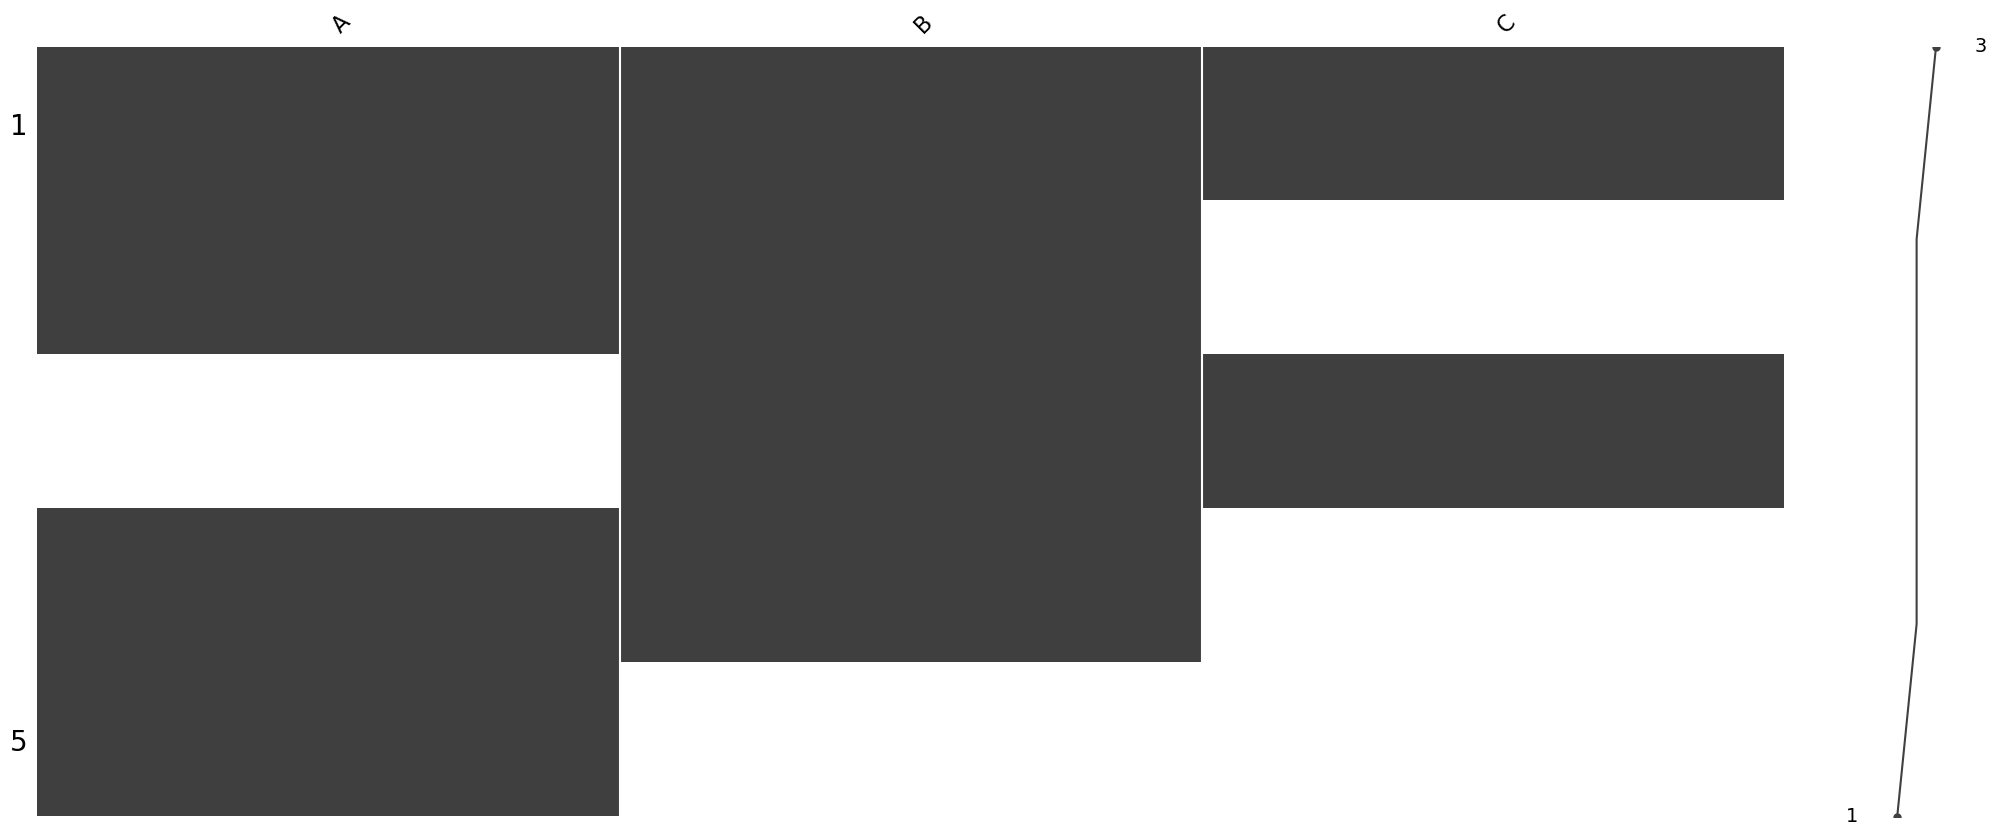

In [185]:
msno.matrix(df_with_nulls)

In [186]:
df_with_nulls.dropna()

,A,B,C
0,1.0,2.0,40.0


In [187]:
df_with_nulls.dropna(thresh=2)

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN


In [188]:
df_with_nulls.dropna(thresh=3,axis=1)

,A,B
0,1.0,2.0
1,100.0,4.0
2,NaN,2.0
3,1000.0,4.0
4,10000.0,NaN


In [189]:
df_with_nulls.fillna('NOWA WARTOŚĆ')

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NOWA WARTOŚĆ
2,NOWA WARTOŚĆ,2.0,20.0
3,1000.0,4.0,NOWA WARTOŚĆ
4,10000.0,NOWA WARTOŚĆ,NOWA WARTOŚĆ


In [190]:
df_with_nulls['B'].fillna(df_with_nulls['B'].mean())

0    2.0
1    4.0
2    2.0
3    4.0
4    3.0
Name: B, dtype: float64

### Merge, join, concatenate

In [191]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],

                    'B': ['B0', 'B1', 'B2', 'B3'],

                    'C': ['C0', 'C1', 'C2', 'C3'],

                    'D': ['D0', 'D1', 'D2', 'D3']},

                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],

                    'B': ['B4', 'B5', 'B6', 'B7'],

                    'C': ['C4', 'C5', 'C6', 'C7'],

                    'D': ['D4', 'D5', 'D6', 'D7']},

                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],

                    'B': ['B8', 'B9', 'B10', 'B11'],

                    'C': ['C8', 'C9', 'C10', 'C11'],

                    'D': ['D8', 'D9', 'D10', 'D11']},

                    index=[8, 9, 10, 11])

In [192]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [193]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [194]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [195]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [196]:
s = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,s])

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,S1
1,NaN,NaN,NaN,NaN,S2
2,NaN,NaN,NaN,NaN,S3
3,NaN,NaN,NaN,NaN,S4


In [197]:
s = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,s],axis=1)

,A,B,C,D,0
0,A0,B0,C0,D0,S1
1,A1,B1,C1,D1,S2
2,A2,B2,C2,D2,S3
3,A3,B3,C3,D3,S4


In [198]:
pd.concat([df1,df2,df3],axis=1,keys=['first','second','third'])

first                second                third               
       A    B    C    D      A    B    C    D     A    B    C    D
0     A0   B0   C0   D0    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
1     A1   B1   C1   D1    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
2     A2   B2   C2   D2    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
3     A3   B3   C3   D3    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
4    NaN  NaN  NaN  NaN     A4   B4   C4   D4   NaN  NaN  NaN  NaN
5    NaN  NaN  NaN  NaN     A5   B5   C5   D5   NaN  NaN  NaN  NaN
6    NaN  NaN  NaN  NaN     A6   B6   C6   D6   NaN  NaN  NaN  NaN
7    NaN  NaN  NaN  NaN     A7   B7   C7   D7   NaN  NaN  NaN  NaN
8    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN    A8   B8   C8   D8
9    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN    A9   B9   C9   D9
10   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   A10  B10  C10  D10
11   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   A11  B11  C11  D11

In [199]:
s = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,s])

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,S1
1,NaN,NaN,NaN,NaN,S2
2,NaN,NaN,NaN,NaN,S3
3,NaN,NaN,NaN,NaN,S4


### TASK
Połącz ze sobą df1, df2, df3 wzdłuż osi poziomej używając funkcji concat. Postaraj się, aby połączona tabela nie rozszerzała się na dodatkowe wiersze w dół.

.......................................

In [200]:
def make_keys(n):
    return [f'key{n}' for n in range(n)]
left = df1.copy()
left['key'] = make_keys(4)
right = df3.copy()
right['key'] = make_keys(4)

In [201]:
left

,A,B,C,D,key
0,A0,B0,C0,D0,key0
1,A1,B1,C1,D1,key1
2,A2,B2,C2,D2,key2
3,A3,B3,C3,D3,key3


In [202]:
right

,A,B,C,D,key
8,A8,B8,C8,D8,key0
9,A9,B9,C9,D9,key1
10,A10,B10,C10,D10,key2
11,A11,B11,C11,D11,key3


In [203]:
pd.merge(left,right,how='inner',on='key')

,A_x,B_x,C_x,D_x,key,A_y,B_y,C_y,D_y
0,A0,B0,C0,D0,key0,A8,B8,C8,D8
1,A1,B1,C1,D1,key1,A9,B9,C9,D9
2,A2,B2,C2,D2,key2,A10,B10,C10,D10
3,A3,B3,C3,D3,key3,A11,B11,C11,D11


In [204]:
new_right = pd.DataFrame({'E': ['E1','E2','E3','E4','E5','E6'],
                          'key': make_keys(6)})
new_right

,E,key
0,E1,key0
1,E2,key1
2,E3,key2
3,E4,key3
4,E5,key4
5,E6,key5


In [205]:
pd.merge(left,new_right,how='inner',on='key')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4


In [206]:
pd.merge(left,new_right,how='outer',on='key')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4
4,NaN,NaN,NaN,NaN,key4,E5
5,NaN,NaN,NaN,NaN,key5,E6


In [208]:
other = pd.DataFrame({'E':['E1','E2','E3','E4','E5','E6']},index=['B1','B2','B3','B4','B5','B6'])
other

,E
B1,E1
B2,E2
B3,E3
B4,E4
B5,E5
B6,E6


In [209]:
left.join(other,on='B')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,NaN
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3


In [210]:
left.join(other,on='B',how='inner')

,A,B,C,D,key,E
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3


### TASK
Użyj funkcji join, aby połączyć ze sobą tabele left oraz right według kolumny key.

In [211]:
left

,A,B,C,D,key
0,A0,B0,C0,D0,key0
1,A1,B1,C1,D1,key1
2,A2,B2,C2,D2,key2
3,A3,B3,C3,D3,key3


In [212]:
right

,A,B,C,D,key
8,A8,B8,C8,D8,key0
9,A9,B9,C9,D9,key1
10,A10,B10,C10,D10,key2
11,A11,B11,C11,D11,key3
